In [6]:
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings('ignore')

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# mnist 분류 모델

In [39]:
# 1. 데이터셋 생성
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [40]:
xTrain.shape  # (60000, 28, 28)

xTrain = xTrain.reshape(60000,784).astype('float32')/255.0
xTest = xTest.reshape(10000,784).astype('float32')/255.0

In [41]:
yTrain.shape  # (60000,)
yTrain

# one-hot 인코딩
yTrain = np_utils.to_categorical(yTrain)
yTest = np_utils.to_categorical(yTest)

In [42]:
# 2. 모델 구성
model = Sequential()

model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [45]:
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [57]:
# 4. 모델 학습
hist = model.fit(xTrain, yTrain, epochs=5, batch_size=32)

Epoch 1/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.2207 - accuracy: 0.9376
Epoch 2/5
60000/60000 [==============================] - 2s 30us/step - loss: 0.2056 - accuracy: 0.9421
Epoch 3/5
60000/60000 [==============================] - 2s 31us/step - loss: 0.1923 - accuracy: 0.9453
Epoch 4/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1809 - accuracy: 0.9487
Epoch 5/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.1708 - accuracy: 0.9518


In [58]:
# 5. 모델 검정
print(hist.history['loss'])
print(hist.history['accuracy'])

[0.22072278389732042, 0.20555209121902784, 0.1923094036291043, 0.18086360019048056, 0.1708080348610878]
[0.93763334, 0.9421, 0.9453167, 0.9487333, 0.95176667]


In [59]:
# 6. 모델 평가

res = model.evaluate(xTest, yTest, batch_size=32)
res

10000/10000 [==============================] - 0s 20us/step


[0.17036081341356038, 0.9506000280380249]

In [61]:
# 모델 예측
xhat = xTest[0:1]
yhat = model.predict(xhat)
print(yhat)

[[4.2015282e-04 4.9709882e-07 9.7006012e-04 3.0119361e-03 6.0482586e-07
  1.7250094e-04 1.5895347e-08 9.9510044e-01 2.6840064e-05 2.9702345e-04]]


In [168]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()

In [169]:
xVal = xTrain[50000:]
yVal = yTrain[50000:]

xTrain = xTrain[:50000]
yTrain = yTrain[:50000]

In [170]:
xTrain = xTrain.reshape(50000,784).astype('float32')/255.0
xVal = xVal.reshape(10000,784).astype('float32')/255.0
xTest = xTest.reshape(10000,784).astype('float32')/255.0

In [171]:
# 훈련, 검증 데이터 선택
tri = np.random.choice(50000,700)
vri = np.random.choice(10000,300)

# 훈련셋과 검증셋 분할
xTrain = xTrain[tri]  # 700
yTrain = yTrain[tri] 

xVal = xVal[vri]  # 300
yVal = yVal[vri]

In [172]:
# 정답 데이터 원핫인코딩
yTrain = np_utils.to_categorical(yTrain)
yVal = np_utils.to_categorical(yVal)
yTest = np_utils.to_categorical(yTest)

In [173]:
# 모델 생성
model = Sequential()

model.add(Dense(input_dim=28*28, units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))


In [174]:
# categorical_crossentropy은 softmax 함수의 값과 실제값의 차이를 구해 loss를 구하는 함수
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [109]:
# 
hist = model.fit(xTrain, yTrain, epochs=3000, batch_size=10, validation_data=(xVal, yVal))


Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 164us/step - loss: 2.2187 - accuracy: 0.2286 - val_loss: 2.1772 - val_accuracy: 0.2333
Epoch 2/3000
700/700 [==============================] - 0s 110us/step - loss: 2.1231 - accuracy: 0.2557 - val_loss: 2.0782 - val_accuracy: 0.2400
Epoch 3/3000
700/700 [==============================] - 0s 114us/step - loss: 2.0429 - accuracy: 0.2700 - val_loss: 2.0148 - val_accuracy: 0.2567
Epoch 4/3000
700/700 [==============================] - 0s 111us/step - loss: 1.9832 - accuracy: 0.2643 - val_loss: 1.9672 - val_accuracy: 0.2667
Epoch 5/3000
700/700 [==============================] - 0s 113us/step - loss: 1.9349 - accuracy: 0.3214 - val_loss: 1.9310 - val_accuracy: 0.2800
Epoch 6/3000
700/700 [==============================] - 0s 110us/step - loss: 1.8909 - accuracy: 0.3400 - val_loss: 1.8998 - val_accuracy: 0.2967
Epoch 7/3000
700/700 [==============================] - 0s 110us/step - loss: 

700/700 [==============================] - 0s 96us/step - loss: 1.2074 - accuracy: 0.5629 - val_loss: 1.3889 - val_accuracy: 0.4567
Epoch 57/3000
700/700 [==============================] - 0s 94us/step - loss: 1.1986 - accuracy: 0.5800 - val_loss: 1.3903 - val_accuracy: 0.4533
Epoch 58/3000
700/700 [==============================] - 0s 94us/step - loss: 1.1935 - accuracy: 0.5614 - val_loss: 1.3749 - val_accuracy: 0.4667
Epoch 59/3000
700/700 [==============================] - 0s 106us/step - loss: 1.1881 - accuracy: 0.5814 - val_loss: 1.3730 - val_accuracy: 0.4633
Epoch 60/3000
700/700 [==============================] - 0s 110us/step - loss: 1.1809 - accuracy: 0.5757 - val_loss: 1.3707 - val_accuracy: 0.4600
Epoch 61/3000
700/700 [==============================] - 0s 109us/step - loss: 1.1726 - accuracy: 0.5800 - val_loss: 1.3595 - val_accuracy: 0.4800
Epoch 62/3000
700/700 [==============================] - 0s 96us/step - loss: 1.1680 - accuracy: 0.5914 - val_loss: 1.3590 - val_accura

Epoch 112/3000
700/700 [==============================] - 0s 104us/step - loss: 0.9603 - accuracy: 0.6657 - val_loss: 1.2991 - val_accuracy: 0.5167
Epoch 113/3000
700/700 [==============================] - 0s 99us/step - loss: 0.9600 - accuracy: 0.6729 - val_loss: 1.2898 - val_accuracy: 0.5100
Epoch 114/3000
700/700 [==============================] - 0s 104us/step - loss: 0.9582 - accuracy: 0.6786 - val_loss: 1.2904 - val_accuracy: 0.4967
Epoch 115/3000
700/700 [==============================] - 0s 104us/step - loss: 0.9529 - accuracy: 0.6771 - val_loss: 1.2824 - val_accuracy: 0.5067
Epoch 116/3000
700/700 [==============================] - 0s 111us/step - loss: 0.9507 - accuracy: 0.6686 - val_loss: 1.2808 - val_accuracy: 0.4967
Epoch 117/3000
700/700 [==============================] - 0s 111us/step - loss: 0.9474 - accuracy: 0.6757 - val_loss: 1.2790 - val_accuracy: 0.5033
Epoch 118/3000
700/700 [==============================] - 0s 104us/step - loss: 0.9469 - accuracy: 0.6857 - val_l

700/700 [==============================] - 0s 107us/step - loss: 0.8315 - accuracy: 0.7129 - val_loss: 1.3008 - val_accuracy: 0.5300
Epoch 168/3000
700/700 [==============================] - 0s 107us/step - loss: 0.8289 - accuracy: 0.7171 - val_loss: 1.2978 - val_accuracy: 0.5067
Epoch 169/3000
700/700 [==============================] - 0s 101us/step - loss: 0.8270 - accuracy: 0.7114 - val_loss: 1.2963 - val_accuracy: 0.5167
Epoch 170/3000
700/700 [==============================] - 0s 114us/step - loss: 0.8266 - accuracy: 0.7129 - val_loss: 1.2978 - val_accuracy: 0.5233
Epoch 171/3000
700/700 [==============================] - 0s 111us/step - loss: 0.8248 - accuracy: 0.7086 - val_loss: 1.2975 - val_accuracy: 0.5200
Epoch 172/3000
700/700 [==============================] - 0s 111us/step - loss: 0.8209 - accuracy: 0.7086 - val_loss: 1.2998 - val_accuracy: 0.5333
Epoch 173/3000
700/700 [==============================] - 0s 106us/step - loss: 0.8190 - accuracy: 0.7229 - val_loss: 1.3050 - 

700/700 [==============================] - 0s 99us/step - loss: 0.7458 - accuracy: 0.7386 - val_loss: 1.3584 - val_accuracy: 0.5267
Epoch 223/3000
700/700 [==============================] - 0s 97us/step - loss: 0.7471 - accuracy: 0.7429 - val_loss: 1.3489 - val_accuracy: 0.5267
Epoch 224/3000
700/700 [==============================] - 0s 107us/step - loss: 0.7433 - accuracy: 0.7429 - val_loss: 1.3491 - val_accuracy: 0.5200
Epoch 225/3000
700/700 [==============================] - 0s 111us/step - loss: 0.7431 - accuracy: 0.7429 - val_loss: 1.3582 - val_accuracy: 0.5300
Epoch 226/3000
700/700 [==============================] - 0s 109us/step - loss: 0.7430 - accuracy: 0.7400 - val_loss: 1.3536 - val_accuracy: 0.5067
Epoch 227/3000
700/700 [==============================] - 0s 113us/step - loss: 0.7417 - accuracy: 0.7414 - val_loss: 1.3599 - val_accuracy: 0.5267
Epoch 228/3000
700/700 [==============================] - 0s 99us/step - loss: 0.7408 - accuracy: 0.7414 - val_loss: 1.3543 - val

700/700 [==============================] - 0s 106us/step - loss: 0.6848 - accuracy: 0.7714 - val_loss: 1.4128 - val_accuracy: 0.5200
Epoch 278/3000
700/700 [==============================] - 0s 97us/step - loss: 0.6835 - accuracy: 0.7671 - val_loss: 1.4146 - val_accuracy: 0.5133
Epoch 279/3000
700/700 [==============================] - 0s 103us/step - loss: 0.6839 - accuracy: 0.7614 - val_loss: 1.4176 - val_accuracy: 0.5233
Epoch 280/3000
700/700 [==============================] - 0s 104us/step - loss: 0.6817 - accuracy: 0.7686 - val_loss: 1.4129 - val_accuracy: 0.5200
Epoch 281/3000
700/700 [==============================] - 0s 97us/step - loss: 0.6821 - accuracy: 0.7686 - val_loss: 1.4216 - val_accuracy: 0.5200
Epoch 282/3000
700/700 [==============================] - 0s 106us/step - loss: 0.6792 - accuracy: 0.7657 - val_loss: 1.4150 - val_accuracy: 0.5000
Epoch 283/3000
700/700 [==============================] - 0s 103us/step - loss: 0.6816 - accuracy: 0.7600 - val_loss: 1.4243 - va

700/700 [==============================] - 0s 109us/step - loss: 0.6352 - accuracy: 0.7800 - val_loss: 1.4891 - val_accuracy: 0.5233
Epoch 333/3000
700/700 [==============================] - 0s 107us/step - loss: 0.6340 - accuracy: 0.7843 - val_loss: 1.4905 - val_accuracy: 0.5300
Epoch 334/3000
700/700 [==============================] - 0s 104us/step - loss: 0.6338 - accuracy: 0.7800 - val_loss: 1.5008 - val_accuracy: 0.5233
Epoch 335/3000
700/700 [==============================] - 0s 97us/step - loss: 0.6317 - accuracy: 0.7943 - val_loss: 1.4944 - val_accuracy: 0.5100
Epoch 336/3000
700/700 [==============================] - 0s 106us/step - loss: 0.6334 - accuracy: 0.7857 - val_loss: 1.5037 - val_accuracy: 0.5333
Epoch 337/3000
700/700 [==============================] - 0s 104us/step - loss: 0.6301 - accuracy: 0.7886 - val_loss: 1.5058 - val_accuracy: 0.5300
Epoch 338/3000
700/700 [==============================] - 0s 106us/step - loss: 0.6303 - accuracy: 0.7800 - val_loss: 1.5098 - v

700/700 [==============================] - 0s 107us/step - loss: 0.5951 - accuracy: 0.8000 - val_loss: 1.5755 - val_accuracy: 0.5300
Epoch 388/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5921 - accuracy: 0.8071 - val_loss: 1.5688 - val_accuracy: 0.5133
Epoch 389/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5930 - accuracy: 0.8043 - val_loss: 1.5734 - val_accuracy: 0.5400
Epoch 390/3000
700/700 [==============================] - 0s 104us/step - loss: 0.5926 - accuracy: 0.7971 - val_loss: 1.5698 - val_accuracy: 0.5300
Epoch 391/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5896 - accuracy: 0.8029 - val_loss: 1.5782 - val_accuracy: 0.5267
Epoch 392/3000
700/700 [==============================] - 0s 104us/step - loss: 0.5895 - accuracy: 0.8029 - val_loss: 1.5693 - val_accuracy: 0.5267
Epoch 393/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5884 - accuracy: 0.8071 - val_loss: 1.5789 - 

700/700 [==============================] - 0s 110us/step - loss: 0.5608 - accuracy: 0.8143 - val_loss: 1.6452 - val_accuracy: 0.5433
Epoch 443/3000
700/700 [==============================] - 0s 107us/step - loss: 0.5581 - accuracy: 0.8157 - val_loss: 1.6519 - val_accuracy: 0.5233
Epoch 444/3000
700/700 [==============================] - 0s 104us/step - loss: 0.5565 - accuracy: 0.8257 - val_loss: 1.6619 - val_accuracy: 0.5367
Epoch 445/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5581 - accuracy: 0.8171 - val_loss: 1.6409 - val_accuracy: 0.5333
Epoch 446/3000
700/700 [==============================] - 0s 100us/step - loss: 0.5578 - accuracy: 0.8214 - val_loss: 1.6394 - val_accuracy: 0.5233
Epoch 447/3000
700/700 [==============================] - 0s 89us/step - loss: 0.5549 - accuracy: 0.8171 - val_loss: 1.6575 - val_accuracy: 0.5333
Epoch 448/3000
700/700 [==============================] - 0s 90us/step - loss: 0.5550 - accuracy: 0.8200 - val_loss: 1.6478 - va

700/700 [==============================] - 0s 107us/step - loss: 0.5265 - accuracy: 0.8343 - val_loss: 1.7168 - val_accuracy: 0.5267
Epoch 498/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5279 - accuracy: 0.8329 - val_loss: 1.7096 - val_accuracy: 0.5300
Epoch 499/3000
700/700 [==============================] - 0s 100us/step - loss: 0.5259 - accuracy: 0.8386 - val_loss: 1.7292 - val_accuracy: 0.5267
Epoch 500/3000
700/700 [==============================] - 0s 106us/step - loss: 0.5268 - accuracy: 0.8300 - val_loss: 1.7156 - val_accuracy: 0.5367
Epoch 501/3000
700/700 [==============================] - 0s 110us/step - loss: 0.5244 - accuracy: 0.8300 - val_loss: 1.7302 - val_accuracy: 0.5267
Epoch 502/3000
700/700 [==============================] - 0s 96us/step - loss: 0.5241 - accuracy: 0.8400 - val_loss: 1.7243 - val_accuracy: 0.5333
Epoch 503/3000
700/700 [==============================] - 0s 126us/step - loss: 0.5249 - accuracy: 0.8314 - val_loss: 1.7303 - v

700/700 [==============================] - 0s 103us/step - loss: 0.4977 - accuracy: 0.8514 - val_loss: 1.7979 - val_accuracy: 0.5467
Epoch 553/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4986 - accuracy: 0.8471 - val_loss: 1.7910 - val_accuracy: 0.5433
Epoch 554/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4973 - accuracy: 0.8429 - val_loss: 1.7992 - val_accuracy: 0.5400
Epoch 555/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4957 - accuracy: 0.8500 - val_loss: 1.8135 - val_accuracy: 0.5467
Epoch 556/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4972 - accuracy: 0.8514 - val_loss: 1.8057 - val_accuracy: 0.5467
Epoch 557/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4950 - accuracy: 0.8543 - val_loss: 1.8129 - val_accuracy: 0.5400
Epoch 558/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4930 - accuracy: 0.8486 - val_loss: 1.8076 - val_

700/700 [==============================] - 0s 94us/step - loss: 0.4748 - accuracy: 0.8557 - val_loss: 1.8650 - val_accuracy: 0.5367
Epoch 608/3000
700/700 [==============================] - 0s 101us/step - loss: 0.4733 - accuracy: 0.8557 - val_loss: 1.8664 - val_accuracy: 0.5333
Epoch 609/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4735 - accuracy: 0.8571 - val_loss: 1.8774 - val_accuracy: 0.5333
Epoch 610/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4728 - accuracy: 0.8571 - val_loss: 1.8660 - val_accuracy: 0.5367
Epoch 611/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4724 - accuracy: 0.8514 - val_loss: 1.8834 - val_accuracy: 0.5333
Epoch 612/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4719 - accuracy: 0.8571 - val_loss: 1.8812 - val_accuracy: 0.5333
Epoch 613/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4718 - accuracy: 0.8571 - val_loss: 1.8805 - v

700/700 [==============================] - 0s 104us/step - loss: 0.4500 - accuracy: 0.8657 - val_loss: 1.9537 - val_accuracy: 0.5200
Epoch 663/3000
700/700 [==============================] - 0s 99us/step - loss: 0.4497 - accuracy: 0.8671 - val_loss: 1.9662 - val_accuracy: 0.5133
Epoch 664/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4514 - accuracy: 0.8614 - val_loss: 1.9703 - val_accuracy: 0.5200
Epoch 665/3000
700/700 [==============================] - 0s 119us/step - loss: 0.4496 - accuracy: 0.8600 - val_loss: 1.9605 - val_accuracy: 0.5233
Epoch 666/3000
700/700 [==============================] - 0s 110us/step - loss: 0.4486 - accuracy: 0.8686 - val_loss: 1.9527 - val_accuracy: 0.5167
Epoch 667/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4489 - accuracy: 0.8686 - val_loss: 1.9646 - val_accuracy: 0.5267
Epoch 668/3000
700/700 [==============================] - 0s 97us/step - loss: 0.4485 - accuracy: 0.8686 - val_loss: 1.9595 - val

700/700 [==============================] - 0s 109us/step - loss: 0.4321 - accuracy: 0.8729 - val_loss: 2.0348 - val_accuracy: 0.5333
Epoch 718/3000
700/700 [==============================] - 0s 97us/step - loss: 0.4297 - accuracy: 0.8771 - val_loss: 2.0345 - val_accuracy: 0.5100
Epoch 719/3000
700/700 [==============================] - 0s 90us/step - loss: 0.4302 - accuracy: 0.8729 - val_loss: 2.0404 - val_accuracy: 0.5133
Epoch 720/3000
700/700 [==============================] - 0s 91us/step - loss: 0.4296 - accuracy: 0.8771 - val_loss: 2.0566 - val_accuracy: 0.5067
Epoch 721/3000
700/700 [==============================] - 0s 93us/step - loss: 0.4321 - accuracy: 0.8786 - val_loss: 2.0419 - val_accuracy: 0.5167
Epoch 722/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4297 - accuracy: 0.8786 - val_loss: 2.0421 - val_accuracy: 0.5400
Epoch 723/3000
700/700 [==============================] - 0s 110us/step - loss: 0.4291 - accuracy: 0.8771 - val_loss: 2.0461 - val_a

700/700 [==============================] - 0s 103us/step - loss: 0.4129 - accuracy: 0.8900 - val_loss: 2.1239 - val_accuracy: 0.4967
Epoch 773/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4150 - accuracy: 0.8871 - val_loss: 2.1329 - val_accuracy: 0.5033
Epoch 774/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4138 - accuracy: 0.8814 - val_loss: 2.1467 - val_accuracy: 0.5167
Epoch 775/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4132 - accuracy: 0.8886 - val_loss: 2.1229 - val_accuracy: 0.5067
Epoch 776/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4132 - accuracy: 0.8857 - val_loss: 2.1230 - val_accuracy: 0.5167
Epoch 777/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4113 - accuracy: 0.8871 - val_loss: 2.1311 - val_accuracy: 0.5100
Epoch 778/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4123 - accuracy: 0.8871 - val_loss: 2.1514 - 

700/700 [==============================] - 0s 137us/step - loss: 0.3973 - accuracy: 0.8986 - val_loss: 2.2049 - val_accuracy: 0.5133
Epoch 828/3000
700/700 [==============================] - 0s 124us/step - loss: 0.3986 - accuracy: 0.8914 - val_loss: 2.2052 - val_accuracy: 0.5200
Epoch 829/3000
700/700 [==============================] - 0s 127us/step - loss: 0.3969 - accuracy: 0.8986 - val_loss: 2.2022 - val_accuracy: 0.5100
Epoch 830/3000
700/700 [==============================] - 0s 146us/step - loss: 0.3969 - accuracy: 0.9014 - val_loss: 2.2344 - val_accuracy: 0.5200
Epoch 831/3000
700/700 [==============================] - 0s 143us/step - loss: 0.3980 - accuracy: 0.8886 - val_loss: 2.2137 - val_accuracy: 0.5167
Epoch 832/3000
700/700 [==============================] - 0s 119us/step - loss: 0.3967 - accuracy: 0.8971 - val_loss: 2.2057 - val_accuracy: 0.5067
Epoch 833/3000
700/700 [==============================] - 0s 113us/step - loss: 0.3966 - accuracy: 0.8943 - val_loss: 2.2086 - 

700/700 [==============================] - 0s 106us/step - loss: 0.3855 - accuracy: 0.8971 - val_loss: 2.2911 - val_accuracy: 0.5100
Epoch 883/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3832 - accuracy: 0.9057 - val_loss: 2.2903 - val_accuracy: 0.5067
Epoch 884/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3841 - accuracy: 0.8971 - val_loss: 2.2789 - val_accuracy: 0.5167
Epoch 885/3000
700/700 [==============================] - 0s 110us/step - loss: 0.3835 - accuracy: 0.8986 - val_loss: 2.2910 - val_accuracy: 0.5067
Epoch 886/3000
700/700 [==============================] - 0s 116us/step - loss: 0.3846 - accuracy: 0.9086 - val_loss: 2.2909 - val_accuracy: 0.5067
Epoch 887/3000
700/700 [==============================] - 0s 110us/step - loss: 0.3828 - accuracy: 0.9000 - val_loss: 2.2955 - val_accuracy: 0.5100
Epoch 888/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3833 - accuracy: 0.8971 - val_loss: 2.3041 - 

700/700 [==============================] - 0s 104us/step - loss: 0.3719 - accuracy: 0.9129 - val_loss: 2.3723 - val_accuracy: 0.5100
Epoch 938/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3711 - accuracy: 0.9071 - val_loss: 2.3666 - val_accuracy: 0.5100
Epoch 939/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3714 - accuracy: 0.9157 - val_loss: 2.3776 - val_accuracy: 0.5133
Epoch 940/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3699 - accuracy: 0.9086 - val_loss: 2.3877 - val_accuracy: 0.5100
Epoch 941/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3708 - accuracy: 0.9071 - val_loss: 2.3607 - val_accuracy: 0.5067
Epoch 942/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3713 - accuracy: 0.9086 - val_loss: 2.3815 - val_accuracy: 0.5167
Epoch 943/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3708 - accuracy: 0.9100 - val_loss: 2.3776 - val

700/700 [==============================] - 0s 96us/step - loss: 0.3579 - accuracy: 0.9171 - val_loss: 2.4477 - val_accuracy: 0.5033
Epoch 993/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3576 - accuracy: 0.9100 - val_loss: 2.4560 - val_accuracy: 0.5067
Epoch 994/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3575 - accuracy: 0.9143 - val_loss: 2.4631 - val_accuracy: 0.5033
Epoch 995/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3576 - accuracy: 0.9157 - val_loss: 2.4502 - val_accuracy: 0.5033
Epoch 996/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3568 - accuracy: 0.9157 - val_loss: 2.4703 - val_accuracy: 0.5067
Epoch 997/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3575 - accuracy: 0.9071 - val_loss: 2.4690 - val_accuracy: 0.5067
Epoch 998/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3556 - accuracy: 0.9171 - val_loss: 2.4617 - val_a

700/700 [==============================] - 0s 103us/step - loss: 0.3464 - accuracy: 0.9171 - val_loss: 2.5550 - val_accuracy: 0.5033
Epoch 1048/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3457 - accuracy: 0.9186 - val_loss: 2.5356 - val_accuracy: 0.5067
Epoch 1049/3000
700/700 [==============================] - 0s 146us/step - loss: 0.3457 - accuracy: 0.9200 - val_loss: 2.5437 - val_accuracy: 0.5200
Epoch 1050/3000
700/700 [==============================] - 0s 119us/step - loss: 0.3453 - accuracy: 0.9214 - val_loss: 2.5566 - val_accuracy: 0.5067
Epoch 1051/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3447 - accuracy: 0.9200 - val_loss: 2.5520 - val_accuracy: 0.5133
Epoch 1052/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3455 - accuracy: 0.9229 - val_loss: 2.5440 - val_accuracy: 0.5100
Epoch 1053/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3445 - accuracy: 0.9200 - val_loss: 2.5604 

700/700 [==============================] - 0s 97us/step - loss: 0.3350 - accuracy: 0.9271 - val_loss: 2.6115 - val_accuracy: 0.5033
Epoch 1103/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3352 - accuracy: 0.9229 - val_loss: 2.6144 - val_accuracy: 0.5100
Epoch 1104/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3347 - accuracy: 0.9286 - val_loss: 2.6232 - val_accuracy: 0.5000
Epoch 1105/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3342 - accuracy: 0.9300 - val_loss: 2.6413 - val_accuracy: 0.5033
Epoch 1106/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3347 - accuracy: 0.9300 - val_loss: 2.6162 - val_accuracy: 0.5067
Epoch 1107/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3345 - accuracy: 0.9271 - val_loss: 2.6176 - val_accuracy: 0.5067
Epoch 1108/3000
700/700 [==============================] - 0s 126us/step - loss: 0.3339 - accuracy: 0.9329 - val_loss: 2.6401 

700/700 [==============================] - 0s 126us/step - loss: 0.3254 - accuracy: 0.9314 - val_loss: 2.7000 - val_accuracy: 0.5000
Epoch 1158/3000
700/700 [==============================] - 0s 121us/step - loss: 0.3265 - accuracy: 0.9414 - val_loss: 2.6900 - val_accuracy: 0.5033
Epoch 1159/3000
700/700 [==============================] - 0s 117us/step - loss: 0.3258 - accuracy: 0.9357 - val_loss: 2.7156 - val_accuracy: 0.5033
Epoch 1160/3000
700/700 [==============================] - 0s 111us/step - loss: 0.3257 - accuracy: 0.9371 - val_loss: 2.7129 - val_accuracy: 0.5100
Epoch 1161/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3252 - accuracy: 0.9371 - val_loss: 2.7030 - val_accuracy: 0.5067
Epoch 1162/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3251 - accuracy: 0.9400 - val_loss: 2.7133 - val_accuracy: 0.5100
Epoch 1163/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3238 - accuracy: 0.9371 - val_loss: 2.72

700/700 [==============================] - 0s 110us/step - loss: 0.3180 - accuracy: 0.9414 - val_loss: 2.7858 - val_accuracy: 0.5000
Epoch 1213/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3167 - accuracy: 0.9386 - val_loss: 2.7966 - val_accuracy: 0.4900
Epoch 1214/3000
700/700 [==============================] - 0s 109us/step - loss: 0.3169 - accuracy: 0.9400 - val_loss: 2.7829 - val_accuracy: 0.5000
Epoch 1215/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3167 - accuracy: 0.9486 - val_loss: 2.7889 - val_accuracy: 0.5033
Epoch 1216/3000
700/700 [==============================] - 0s 109us/step - loss: 0.3164 - accuracy: 0.9386 - val_loss: 2.7840 - val_accuracy: 0.5000
Epoch 1217/3000
700/700 [==============================] - 0s 110us/step - loss: 0.3167 - accuracy: 0.9400 - val_loss: 2.7818 - val_accuracy: 0.4933
Epoch 1218/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3168 - accuracy: 0.9429 - val_loss: 2.78

700/700 [==============================] - 0s 120us/step - loss: 0.3101 - accuracy: 0.9429 - val_loss: 2.8552 - val_accuracy: 0.5033
Epoch 1268/3000
700/700 [==============================] - 0s 117us/step - loss: 0.3095 - accuracy: 0.9429 - val_loss: 2.8536 - val_accuracy: 0.5033
Epoch 1269/3000
700/700 [==============================] - 0s 114us/step - loss: 0.3092 - accuracy: 0.9443 - val_loss: 2.8520 - val_accuracy: 0.5033
Epoch 1270/3000
700/700 [==============================] - 0s 118us/step - loss: 0.3082 - accuracy: 0.9457 - val_loss: 2.8684 - val_accuracy: 0.5167
Epoch 1271/3000
700/700 [==============================] - 0s 114us/step - loss: 0.3087 - accuracy: 0.9429 - val_loss: 2.8736 - val_accuracy: 0.5000
Epoch 1272/3000
700/700 [==============================] - 0s 121us/step - loss: 0.3083 - accuracy: 0.9486 - val_loss: 2.8565 - val_accuracy: 0.5000
Epoch 1273/3000
700/700 [==============================] - 0s 127us/step - loss: 0.3083 - accuracy: 0.9457 - val_loss: 2.8

700/700 [==============================] - 0s 107us/step - loss: 0.3019 - accuracy: 0.9471 - val_loss: 2.9260 - val_accuracy: 0.5033
Epoch 1323/3000
700/700 [==============================] - 0s 109us/step - loss: 0.3017 - accuracy: 0.9486 - val_loss: 2.9315 - val_accuracy: 0.5000
Epoch 1324/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3011 - accuracy: 0.9414 - val_loss: 2.9373 - val_accuracy: 0.5033
Epoch 1325/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3016 - accuracy: 0.9486 - val_loss: 2.9218 - val_accuracy: 0.5000
Epoch 1326/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3008 - accuracy: 0.9500 - val_loss: 2.9538 - val_accuracy: 0.5067
Epoch 1327/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3011 - accuracy: 0.9457 - val_loss: 2.9483 - val_accuracy: 0.5067
Epoch 1328/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3015 - accuracy: 0.9429 - val_loss: 2.9356 

700/700 [==============================] - 0s 94us/step - loss: 0.2911 - accuracy: 0.9500 - val_loss: 3.0130 - val_accuracy: 0.4967
Epoch 1378/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2911 - accuracy: 0.9500 - val_loss: 2.9988 - val_accuracy: 0.5100
Epoch 1379/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2903 - accuracy: 0.9529 - val_loss: 3.0298 - val_accuracy: 0.5033
Epoch 1380/3000
700/700 [==============================] - 0s 123us/step - loss: 0.2903 - accuracy: 0.9486 - val_loss: 3.0304 - val_accuracy: 0.4967
Epoch 1381/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2904 - accuracy: 0.9486 - val_loss: 3.0136 - val_accuracy: 0.5100
Epoch 1382/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2908 - accuracy: 0.9486 - val_loss: 3.0108 - val_accuracy: 0.4967
Epoch 1383/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2901 - accuracy: 0.9486 - val_loss: 3.0340 

700/700 [==============================] - 0s 104us/step - loss: 0.2843 - accuracy: 0.9514 - val_loss: 3.1140 - val_accuracy: 0.4933
Epoch 1433/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2842 - accuracy: 0.9471 - val_loss: 3.1035 - val_accuracy: 0.4967
Epoch 1434/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2842 - accuracy: 0.9514 - val_loss: 3.0738 - val_accuracy: 0.5000
Epoch 1435/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2836 - accuracy: 0.9500 - val_loss: 3.0970 - val_accuracy: 0.4967
Epoch 1436/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2839 - accuracy: 0.9500 - val_loss: 3.0968 - val_accuracy: 0.4900
Epoch 1437/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2829 - accuracy: 0.9514 - val_loss: 3.1324 - val_accuracy: 0.5067
Epoch 1438/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2842 - accuracy: 0.9500 - val_loss: 3.0952 -

700/700 [==============================] - 0s 97us/step - loss: 0.2773 - accuracy: 0.9529 - val_loss: 3.1696 - val_accuracy: 0.4900
Epoch 1488/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2773 - accuracy: 0.9500 - val_loss: 3.1644 - val_accuracy: 0.4933
Epoch 1489/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2774 - accuracy: 0.9514 - val_loss: 3.1713 - val_accuracy: 0.5000
Epoch 1490/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2775 - accuracy: 0.9529 - val_loss: 3.1703 - val_accuracy: 0.4933
Epoch 1491/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2775 - accuracy: 0.9543 - val_loss: 3.1608 - val_accuracy: 0.4867
Epoch 1492/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2771 - accuracy: 0.9529 - val_loss: 3.1857 - val_accuracy: 0.4933
Epoch 1493/3000
700/700 [==============================] - 0s 110us/step - loss: 0.2774 - accuracy: 0.9514 - val_loss: 3.176

700/700 [==============================] - 0s 103us/step - loss: 0.2707 - accuracy: 0.9543 - val_loss: 3.2314 - val_accuracy: 0.4933
Epoch 1543/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2700 - accuracy: 0.9514 - val_loss: 3.2736 - val_accuracy: 0.4900
Epoch 1544/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2699 - accuracy: 0.9571 - val_loss: 3.2252 - val_accuracy: 0.4800
Epoch 1545/3000
700/700 [==============================] - 0s 124us/step - loss: 0.2699 - accuracy: 0.9529 - val_loss: 3.2732 - val_accuracy: 0.4900
Epoch 1546/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2705 - accuracy: 0.9571 - val_loss: 3.2835 - val_accuracy: 0.4900
Epoch 1547/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2698 - accuracy: 0.9557 - val_loss: 3.2567 - val_accuracy: 0.4900
Epoch 1548/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2692 - accuracy: 0.9529 - val_loss: 3.236

700/700 [==============================] - ETA: 0s - loss: 0.2671 - accuracy: 0.95 - 0s 106us/step - loss: 0.2650 - accuracy: 0.9557 - val_loss: 3.3217 - val_accuracy: 0.4900
Epoch 1598/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2644 - accuracy: 0.9543 - val_loss: 3.3056 - val_accuracy: 0.4933
Epoch 1599/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2647 - accuracy: 0.9514 - val_loss: 3.3171 - val_accuracy: 0.4933
Epoch 1600/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2646 - accuracy: 0.9543 - val_loss: 3.3158 - val_accuracy: 0.4867
Epoch 1601/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2641 - accuracy: 0.9514 - val_loss: 3.3197 - val_accuracy: 0.4833
Epoch 1602/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2646 - accuracy: 0.9557 - val_loss: 3.3015 - val_accuracy: 0.4933
Epoch 1603/3000
700/700 [==============================] - 0s 106us/step - loss: 

Epoch 1652/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2594 - accuracy: 0.9571 - val_loss: 3.3842 - val_accuracy: 0.4867
Epoch 1653/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2606 - accuracy: 0.9571 - val_loss: 3.3907 - val_accuracy: 0.4900
Epoch 1654/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2600 - accuracy: 0.9600 - val_loss: 3.3695 - val_accuracy: 0.4833
Epoch 1655/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2596 - accuracy: 0.9543 - val_loss: 3.3702 - val_accuracy: 0.4867
Epoch 1656/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2597 - accuracy: 0.9571 - val_loss: 3.3927 - val_accuracy: 0.4900
Epoch 1657/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2596 - accuracy: 0.9543 - val_loss: 3.3733 - val_accuracy: 0.4867
Epoch 1658/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2592 - accuracy: 0.9557 

Epoch 1707/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2550 - accuracy: 0.9586 - val_loss: 3.4372 - val_accuracy: 0.4867
Epoch 1708/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2544 - accuracy: 0.9571 - val_loss: 3.4673 - val_accuracy: 0.4833
Epoch 1709/3000
700/700 [==============================] - 0s 111us/step - loss: 0.2545 - accuracy: 0.9571 - val_loss: 3.4515 - val_accuracy: 0.4833
Epoch 1710/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2546 - accuracy: 0.9586 - val_loss: 3.4434 - val_accuracy: 0.4867
Epoch 1711/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2545 - accuracy: 0.9557 - val_loss: 3.4610 - val_accuracy: 0.4833
Epoch 1712/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2545 - accuracy: 0.9543 - val_loss: 3.4429 - val_accuracy: 0.4900
Epoch 1713/3000
700/700 [==============================] - 0s 110us/step - loss: 0.2545 - accuracy: 0.9571 - 

700/700 [==============================] - 0s 104us/step - loss: 0.2503 - accuracy: 0.9629 - val_loss: 3.5295 - val_accuracy: 0.4867
Epoch 1763/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2506 - accuracy: 0.9586 - val_loss: 3.5202 - val_accuracy: 0.4800
Epoch 1764/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2498 - accuracy: 0.9557 - val_loss: 3.5138 - val_accuracy: 0.4867
Epoch 1765/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2509 - accuracy: 0.9600 - val_loss: 3.4958 - val_accuracy: 0.4833
Epoch 1766/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2500 - accuracy: 0.9600 - val_loss: 3.5197 - val_accuracy: 0.4933
Epoch 1767/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2506 - accuracy: 0.9571 - val_loss: 3.5182 - val_accuracy: 0.4900
Epoch 1768/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2495 - accuracy: 0.9571 - val_loss: 3.4

700/700 [==============================] - 0s 93us/step - loss: 0.2466 - accuracy: 0.9600 - val_loss: 3.5849 - val_accuracy: 0.4867
Epoch 1818/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2463 - accuracy: 0.9600 - val_loss: 3.5750 - val_accuracy: 0.4833
Epoch 1819/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2462 - accuracy: 0.9586 - val_loss: 3.5750 - val_accuracy: 0.4833
Epoch 1820/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2462 - accuracy: 0.9614 - val_loss: 3.5865 - val_accuracy: 0.4867
Epoch 1821/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2460 - accuracy: 0.9600 - val_loss: 3.5805 - val_accuracy: 0.4833
Epoch 1822/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2459 - accuracy: 0.9571 - val_loss: 3.6110 - val_accuracy: 0.4833
Epoch 1823/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2463 - accuracy: 0.9571 - val_loss: 3.6132 

700/700 [==============================] - 0s 109us/step - loss: 0.2418 - accuracy: 0.9629 - val_loss: 3.6219 - val_accuracy: 0.4833
Epoch 1873/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2415 - accuracy: 0.9586 - val_loss: 3.6291 - val_accuracy: 0.4867
Epoch 1874/3000
700/700 [==============================] - 0s 119us/step - loss: 0.2413 - accuracy: 0.9586 - val_loss: 3.6322 - val_accuracy: 0.4867
Epoch 1875/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2414 - accuracy: 0.9600 - val_loss: 3.6326 - val_accuracy: 0.4867
Epoch 1876/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2415 - accuracy: 0.9586 - val_loss: 3.6233 - val_accuracy: 0.4800
Epoch 1877/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2414 - accuracy: 0.9629 - val_loss: 3.6509 - val_accuracy: 0.4833
Epoch 1878/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2411 - accuracy: 0.9614 - val_loss: 3.6574

700/700 [==============================] - 0s 97us/step - loss: 0.2374 - accuracy: 0.9629 - val_loss: 3.7053 - val_accuracy: 0.4867
Epoch 1928/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2369 - accuracy: 0.9657 - val_loss: 3.6776 - val_accuracy: 0.4767
Epoch 1929/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2375 - accuracy: 0.9571 - val_loss: 3.6758 - val_accuracy: 0.4867
Epoch 1930/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2382 - accuracy: 0.9600 - val_loss: 3.6853 - val_accuracy: 0.4800
Epoch 1931/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2379 - accuracy: 0.9629 - val_loss: 3.7107 - val_accuracy: 0.4867
Epoch 1932/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2374 - accuracy: 0.9600 - val_loss: 3.6990 - val_accuracy: 0.4833
Epoch 1933/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2372 - accuracy: 0.9614 - val_loss: 3.694

700/700 [==============================] - 0s 110us/step - loss: 0.2343 - accuracy: 0.9629 - val_loss: 3.7374 - val_accuracy: 0.4867
Epoch 1983/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2342 - accuracy: 0.9643 - val_loss: 3.7629 - val_accuracy: 0.4867
Epoch 1984/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2343 - accuracy: 0.9600 - val_loss: 3.7597 - val_accuracy: 0.4833
Epoch 1985/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2336 - accuracy: 0.9586 - val_loss: 3.7332 - val_accuracy: 0.4867
Epoch 1986/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2339 - accuracy: 0.9614 - val_loss: 3.7650 - val_accuracy: 0.4833
Epoch 1987/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2343 - accuracy: 0.9643 - val_loss: 3.7528 - val_accuracy: 0.4833
Epoch 1988/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2335 - accuracy: 0.9629 - val_loss: 3.7643 

700/700 [==============================] - 0s 104us/step - loss: 0.2310 - accuracy: 0.9643 - val_loss: 3.8231 - val_accuracy: 0.4800
Epoch 2038/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2311 - accuracy: 0.9629 - val_loss: 3.8190 - val_accuracy: 0.4867
Epoch 2039/3000
700/700 [==============================] - 0s 127us/step - loss: 0.2307 - accuracy: 0.9629 - val_loss: 3.8157 - val_accuracy: 0.4900
Epoch 2040/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2306 - accuracy: 0.9643 - val_loss: 3.8133 - val_accuracy: 0.4867
Epoch 2041/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2306 - accuracy: 0.9629 - val_loss: 3.8264 - val_accuracy: 0.4767
Epoch 2042/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2303 - accuracy: 0.9629 - val_loss: 3.8198 - val_accuracy: 0.4833
Epoch 2043/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2307 - accuracy: 0.9614 - val_loss: 3.8336 

700/700 [==============================] - 0s 103us/step - loss: 0.2278 - accuracy: 0.9614 - val_loss: 3.8648 - val_accuracy: 0.4867
Epoch 2093/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2273 - accuracy: 0.9657 - val_loss: 3.8618 - val_accuracy: 0.4800
Epoch 2094/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2275 - accuracy: 0.9657 - val_loss: 3.8555 - val_accuracy: 0.4833
Epoch 2095/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2276 - accuracy: 0.9629 - val_loss: 3.8896 - val_accuracy: 0.4767
Epoch 2096/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2278 - accuracy: 0.9643 - val_loss: 3.8618 - val_accuracy: 0.4833
Epoch 2097/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2275 - accuracy: 0.9657 - val_loss: 3.8801 - val_accuracy: 0.4833
Epoch 2098/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2275 - accuracy: 0.9657 - val_loss: 3.8676 

700/700 [==============================] - 0s 104us/step - loss: 0.2244 - accuracy: 0.9629 - val_loss: 3.9255 - val_accuracy: 0.4933
Epoch 2148/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2244 - accuracy: 0.9643 - val_loss: 3.9261 - val_accuracy: 0.4867
Epoch 2149/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2245 - accuracy: 0.9600 - val_loss: 3.9649 - val_accuracy: 0.4800
Epoch 2150/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2246 - accuracy: 0.9629 - val_loss: 3.9154 - val_accuracy: 0.4867
Epoch 2151/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2245 - accuracy: 0.9657 - val_loss: 3.9162 - val_accuracy: 0.4867
Epoch 2152/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2245 - accuracy: 0.9643 - val_loss: 3.9259 - val_accuracy: 0.4900
Epoch 2153/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2241 - accuracy: 0.9600 - val_loss: 3.944

700/700 [==============================] - 0s 101us/step - loss: 0.2216 - accuracy: 0.9657 - val_loss: 3.9974 - val_accuracy: 0.4833
Epoch 2203/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2214 - accuracy: 0.9629 - val_loss: 3.9788 - val_accuracy: 0.4900
Epoch 2204/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2215 - accuracy: 0.9614 - val_loss: 3.9890 - val_accuracy: 0.4867
Epoch 2205/3000
700/700 [==============================] - 0s 120us/step - loss: 0.2218 - accuracy: 0.9657 - val_loss: 3.9830 - val_accuracy: 0.4933
Epoch 2206/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2216 - accuracy: 0.9657 - val_loss: 3.9835 - val_accuracy: 0.4867
Epoch 2207/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2212 - accuracy: 0.9643 - val_loss: 4.0137 - val_accuracy: 0.4833
Epoch 2208/3000
700/700 [==============================] - 0s 126us/step - loss: 0.2214 - accuracy: 0.9600 - val_loss: 3.9751

700/700 [==============================] - 0s 96us/step - loss: 0.2171 - accuracy: 0.9629 - val_loss: 4.0337 - val_accuracy: 0.4867
Epoch 2258/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2176 - accuracy: 0.9657 - val_loss: 4.0435 - val_accuracy: 0.4900
Epoch 2259/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2171 - accuracy: 0.9657 - val_loss: 4.0178 - val_accuracy: 0.4867
Epoch 2260/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2172 - accuracy: 0.9643 - val_loss: 4.0357 - val_accuracy: 0.4867
Epoch 2261/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2170 - accuracy: 0.9671 - val_loss: 4.0496 - val_accuracy: 0.4833
Epoch 2262/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2170 - accuracy: 0.9671 - val_loss: 4.0217 - val_accuracy: 0.4867
Epoch 2263/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2168 - accuracy: 0.9657 - val_loss: 4.0420 - 

Epoch 2312/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2146 - accuracy: 0.9657 - val_loss: 4.0764 - val_accuracy: 0.4867
Epoch 2313/3000
700/700 [==============================] - 0s 110us/step - loss: 0.2148 - accuracy: 0.9657 - val_loss: 4.0879 - val_accuracy: 0.4833
Epoch 2314/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2143 - accuracy: 0.9643 - val_loss: 4.0731 - val_accuracy: 0.4900
Epoch 2315/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2144 - accuracy: 0.9671 - val_loss: 4.0848 - val_accuracy: 0.4867
Epoch 2316/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2144 - accuracy: 0.9671 - val_loss: 4.0835 - val_accuracy: 0.4833
Epoch 2317/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2141 - accuracy: 0.9671 - val_loss: 4.1007 - val_accuracy: 0.4833
Epoch 2318/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2140 - accuracy: 0.9657 

700/700 [==============================] - 0s 107us/step - loss: 0.2115 - accuracy: 0.9657 - val_loss: 4.1580 - val_accuracy: 0.4867
Epoch 2368/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2118 - accuracy: 0.9657 - val_loss: 4.1537 - val_accuracy: 0.4900
Epoch 2369/3000
700/700 [==============================] - 0s 129us/step - loss: 0.2124 - accuracy: 0.9643 - val_loss: 4.1397 - val_accuracy: 0.4833
Epoch 2370/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2118 - accuracy: 0.9643 - val_loss: 4.1559 - val_accuracy: 0.4867
Epoch 2371/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2119 - accuracy: 0.9657 - val_loss: 4.1326 - val_accuracy: 0.4833
Epoch 2372/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2117 - accuracy: 0.9643 - val_loss: 4.1474 - val_accuracy: 0.4867
Epoch 2373/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2115 - accuracy: 0.9629 - val_loss: 4.143

700/700 [==============================] - 0s 103us/step - loss: 0.2094 - accuracy: 0.9671 - val_loss: 4.1610 - val_accuracy: 0.4833
Epoch 2423/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2095 - accuracy: 0.9657 - val_loss: 4.1966 - val_accuracy: 0.4833
Epoch 2424/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2094 - accuracy: 0.9671 - val_loss: 4.1861 - val_accuracy: 0.4833
Epoch 2425/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2094 - accuracy: 0.9657 - val_loss: 4.1955 - val_accuracy: 0.4867
Epoch 2426/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2094 - accuracy: 0.9671 - val_loss: 4.1852 - val_accuracy: 0.4867
Epoch 2427/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2091 - accuracy: 0.9657 - val_loss: 4.1814 - val_accuracy: 0.4833
Epoch 2428/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2089 - accuracy: 0.9671 - val_loss: 4.20

700/700 [==============================] - 0s 106us/step - loss: 0.2073 - accuracy: 0.9657 - val_loss: 4.2166 - val_accuracy: 0.4833
Epoch 2478/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2073 - accuracy: 0.9643 - val_loss: 4.2238 - val_accuracy: 0.4833
Epoch 2479/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2070 - accuracy: 0.9657 - val_loss: 4.2261 - val_accuracy: 0.4833
Epoch 2480/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2071 - accuracy: 0.9671 - val_loss: 4.2216 - val_accuracy: 0.4833
Epoch 2481/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2071 - accuracy: 0.9629 - val_loss: 4.2474 - val_accuracy: 0.4833
Epoch 2482/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2071 - accuracy: 0.9657 - val_loss: 4.2137 - val_accuracy: 0.4867
Epoch 2483/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2068 - accuracy: 0.9671 - val_loss: 4.2

Epoch 2532/3000
700/700 [==============================] - 0s 114us/step - loss: 0.2049 - accuracy: 0.9671 - val_loss: 4.3014 - val_accuracy: 0.4867
Epoch 2533/3000
700/700 [==============================] - 0s 127us/step - loss: 0.2051 - accuracy: 0.9671 - val_loss: 4.2658 - val_accuracy: 0.4833
Epoch 2534/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2048 - accuracy: 0.9657 - val_loss: 4.2842 - val_accuracy: 0.4833
Epoch 2535/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2048 - accuracy: 0.9671 - val_loss: 4.2596 - val_accuracy: 0.4833
Epoch 2536/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2050 - accuracy: 0.9643 - val_loss: 4.2801 - val_accuracy: 0.4833
Epoch 2537/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2048 - accuracy: 0.9657 - val_loss: 4.2649 - val_accuracy: 0.4833
Epoch 2538/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2044 - accuracy: 0.9671 - v

700/700 [==============================] - 0s 104us/step - loss: 0.2029 - accuracy: 0.9657 - val_loss: 4.3160 - val_accuracy: 0.4833
Epoch 2588/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2029 - accuracy: 0.9686 - val_loss: 4.3100 - val_accuracy: 0.4833
Epoch 2589/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2030 - accuracy: 0.9671 - val_loss: 4.3221 - val_accuracy: 0.4833
Epoch 2590/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2029 - accuracy: 0.9686 - val_loss: 4.3143 - val_accuracy: 0.4800
Epoch 2591/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2029 - accuracy: 0.9657 - val_loss: 4.3016 - val_accuracy: 0.4833
Epoch 2592/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2028 - accuracy: 0.9671 - val_loss: 4.3381 - val_accuracy: 0.4833
Epoch 2593/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2027 - accuracy: 0.9671 - val_loss: 4.3

700/700 [==============================] - 0s 106us/step - loss: 0.2014 - accuracy: 0.9686 - val_loss: 4.3717 - val_accuracy: 0.4833
Epoch 2643/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2009 - accuracy: 0.9686 - val_loss: 4.3441 - val_accuracy: 0.4800
Epoch 2644/3000
700/700 [==============================] - 0s 110us/step - loss: 0.2011 - accuracy: 0.9671 - val_loss: 4.3778 - val_accuracy: 0.4867
Epoch 2645/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2007 - accuracy: 0.9671 - val_loss: 4.3792 - val_accuracy: 0.4867
Epoch 2646/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2008 - accuracy: 0.9671 - val_loss: 4.3760 - val_accuracy: 0.4833
Epoch 2647/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2006 - accuracy: 0.9671 - val_loss: 4.3810 - val_accuracy: 0.4900
Epoch 2648/3000
700/700 [==============================] - 0s 111us/step - loss: 0.2008 - accuracy: 0.9686 - val_loss: 4.3

700/700 [==============================] - 0s 93us/step - loss: 0.1988 - accuracy: 0.9671 - val_loss: 4.4287 - val_accuracy: 0.4900
Epoch 2698/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1992 - accuracy: 0.9686 - val_loss: 4.4224 - val_accuracy: 0.4867
Epoch 2699/3000
700/700 [==============================] - 0s 107us/step - loss: 0.1990 - accuracy: 0.9686 - val_loss: 4.4170 - val_accuracy: 0.4867
Epoch 2700/3000
700/700 [==============================] - 0s 111us/step - loss: 0.1989 - accuracy: 0.9671 - val_loss: 4.4097 - val_accuracy: 0.4867
Epoch 2701/3000
700/700 [==============================] - 0s 111us/step - loss: 0.1992 - accuracy: 0.9686 - val_loss: 4.4130 - val_accuracy: 0.4833
Epoch 2702/3000
700/700 [==============================] - 0s 110us/step - loss: 0.1988 - accuracy: 0.9686 - val_loss: 4.4056 - val_accuracy: 0.4867
Epoch 2703/3000
700/700 [==============================] - 0s 107us/step - loss: 0.1984 - accuracy: 0.9686 - val_loss: 4.41

700/700 [==============================] - 0s 107us/step - loss: 0.1973 - accuracy: 0.9686 - val_loss: 4.4871 - val_accuracy: 0.4867
Epoch 2753/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1973 - accuracy: 0.9686 - val_loss: 4.4536 - val_accuracy: 0.4833
Epoch 2754/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1969 - accuracy: 0.9671 - val_loss: 4.4700 - val_accuracy: 0.4867
Epoch 2755/3000
700/700 [==============================] - 0s 107us/step - loss: 0.1970 - accuracy: 0.9671 - val_loss: 4.4410 - val_accuracy: 0.4833
Epoch 2756/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1972 - accuracy: 0.9686 - val_loss: 4.4533 - val_accuracy: 0.4833
Epoch 2757/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1968 - accuracy: 0.9671 - val_loss: 4.4763 - val_accuracy: 0.4867
Epoch 2758/3000
700/700 [==============================] - 0s 103us/step - loss: 0.1971 - accuracy: 0.9671 - val_loss: 4.4

700/700 [==============================] - 0s 93us/step - loss: 0.1953 - accuracy: 0.9686 - val_loss: 4.5001 - val_accuracy: 0.4800
Epoch 2808/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1953 - accuracy: 0.9686 - val_loss: 4.4856 - val_accuracy: 0.4833
Epoch 2809/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1955 - accuracy: 0.9686 - val_loss: 4.4880 - val_accuracy: 0.4833
Epoch 2810/3000
700/700 [==============================] - 0s 103us/step - loss: 0.1954 - accuracy: 0.9671 - val_loss: 4.4936 - val_accuracy: 0.4833
Epoch 2811/3000
700/700 [==============================] - 0s 103us/step - loss: 0.1953 - accuracy: 0.9657 - val_loss: 4.5059 - val_accuracy: 0.4833
Epoch 2812/3000
700/700 [==============================] - 0s 109us/step - loss: 0.1956 - accuracy: 0.9643 - val_loss: 4.4944 - val_accuracy: 0.4833
Epoch 2813/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1952 - accuracy: 0.9686 - val_loss: 4.50

Epoch 2862/3000
700/700 [==============================] - 0s 101us/step - loss: 0.1939 - accuracy: 0.9686 - val_loss: 4.5141 - val_accuracy: 0.4833
Epoch 2863/3000
700/700 [==============================] - 0s 96us/step - loss: 0.1937 - accuracy: 0.9686 - val_loss: 4.5567 - val_accuracy: 0.4900
Epoch 2864/3000
700/700 [==============================] - 0s 107us/step - loss: 0.1938 - accuracy: 0.9686 - val_loss: 4.5502 - val_accuracy: 0.4800
Epoch 2865/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1936 - accuracy: 0.9671 - val_loss: 4.5195 - val_accuracy: 0.4833
Epoch 2866/3000
700/700 [==============================] - 0s 110us/step - loss: 0.1936 - accuracy: 0.9671 - val_loss: 4.5412 - val_accuracy: 0.4833
Epoch 2867/3000
700/700 [==============================] - 0s 149us/step - loss: 0.1934 - accuracy: 0.9686 - val_loss: 4.5118 - val_accuracy: 0.4867
Epoch 2868/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1936 - accuracy: 0.9671 

700/700 [==============================] - 0s 106us/step - loss: 0.1912 - accuracy: 0.9686 - val_loss: 4.5756 - val_accuracy: 0.4833
Epoch 2918/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1915 - accuracy: 0.9686 - val_loss: 4.5795 - val_accuracy: 0.4833
Epoch 2919/3000
700/700 [==============================] - 0s 100us/step - loss: 0.1916 - accuracy: 0.9657 - val_loss: 4.5877 - val_accuracy: 0.4867
Epoch 2920/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1914 - accuracy: 0.9671 - val_loss: 4.5781 - val_accuracy: 0.4833
Epoch 2921/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1913 - accuracy: 0.9686 - val_loss: 4.5969 - val_accuracy: 0.4800
Epoch 2922/3000
700/700 [==============================] - 0s 103us/step - loss: 0.1913 - accuracy: 0.9671 - val_loss: 4.5849 - val_accuracy: 0.4833
Epoch 2923/3000
700/700 [==============================] - 0s 104us/step - loss: 0.1911 - accuracy: 0.9671 - val_loss: 4.6

700/700 [==============================] - 0s 106us/step - loss: 0.1895 - accuracy: 0.9686 - val_loss: 4.6320 - val_accuracy: 0.4800
Epoch 2973/3000
700/700 [==============================] - 0s 109us/step - loss: 0.1893 - accuracy: 0.9686 - val_loss: 4.6574 - val_accuracy: 0.4800
Epoch 2974/3000
700/700 [==============================] - 0s 109us/step - loss: 0.1894 - accuracy: 0.9686 - val_loss: 4.6085 - val_accuracy: 0.4833
Epoch 2975/3000
700/700 [==============================] - 0s 114us/step - loss: 0.1894 - accuracy: 0.9671 - val_loss: 4.6287 - val_accuracy: 0.4833
Epoch 2976/3000
700/700 [==============================] - 0s 119us/step - loss: 0.1893 - accuracy: 0.9686 - val_loss: 4.6232 - val_accuracy: 0.4800
Epoch 2977/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1894 - accuracy: 0.9686 - val_loss: 4.6134 - val_accuracy: 0.4833
Epoch 2978/3000
700/700 [==============================] - 0s 106us/step - loss: 0.1895 - accuracy: 0.9671 - val_loss: 4.6

In [111]:
import matplotlib.pyplot as plt

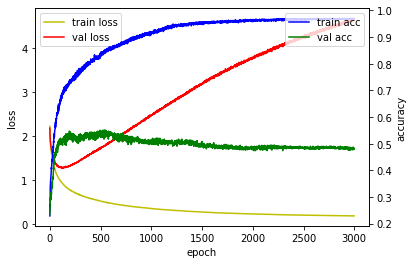

In [132]:
figs, loss_ax = plt.subplots()

# 축을 공유하는 플랏을 만드는 함수
acc_ax = loss_ax.twinx()
# loss 그래프
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# acc 그래프
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

# 범례
loss_ax.legend(loc='upper left')

acc_ax.legend(loc='upper right')

# 축이름
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

plt.show()

In [118]:
?plt.xticks

In [134]:
res = model.evaluate(xTest, yTest, batch_size=32)

res

10000/10000 [==============================] - 0s 17us/step


[4.961728657150268, 0.4803999960422516]

In [175]:
# early stopping
# 콜백함수 : 어떤 상황이 되었을 때(val loss가 떨어지다가 올라가게 된 시점) 함수 내에서 또 다른 어떤 함수를 호출하는 것

from keras.callbacks import EarlyStopping

# es = EarlyStopping()
es = EarlyStopping(patience=30)

In [176]:
# early stopping 적용
hist = model.fit(xTrain, yTrain, epochs=3000, batch_size=10, validation_data=(xVal, yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 244us/step - loss: 2.2975 - accuracy: 0.0871 - val_loss: 2.2871 - val_accuracy: 0.1467
Epoch 2/3000
700/700 [==============================] - 0s 131us/step - loss: 2.2636 - accuracy: 0.1600 - val_loss: 2.2411 - val_accuracy: 0.2400
Epoch 3/3000
700/700 [==============================] - 0s 113us/step - loss: 2.2216 - accuracy: 0.1971 - val_loss: 2.2099 - val_accuracy: 0.2533
Epoch 4/3000
700/700 [==============================] - 0s 114us/step - loss: 2.1876 - accuracy: 0.2129 - val_loss: 2.1837 - val_accuracy: 0.2200
Epoch 5/3000
700/700 [==============================] - 0s 114us/step - loss: 2.1558 - accuracy: 0.2429 - val_loss: 2.1521 - val_accuracy: 0.2833
Epoch 6/3000
700/700 [==============================] - 0s 111us/step - loss: 2.1265 - accuracy: 0.2714 - val_loss: 2.1205 - val_accuracy: 0.2767
Epoch 7/3000
700/700 [==============================] - 0s 111us/step - loss: 

700/700 [==============================] - 0s 109us/step - loss: 1.4187 - accuracy: 0.4729 - val_loss: 1.5294 - val_accuracy: 0.4633
Epoch 57/3000
700/700 [==============================] - 0s 134us/step - loss: 1.4126 - accuracy: 0.4771 - val_loss: 1.5302 - val_accuracy: 0.4733
Epoch 58/3000
700/700 [==============================] - 0s 140us/step - loss: 1.4074 - accuracy: 0.4743 - val_loss: 1.5378 - val_accuracy: 0.4700
Epoch 59/3000
700/700 [==============================] - 0s 130us/step - loss: 1.4025 - accuracy: 0.4871 - val_loss: 1.5223 - val_accuracy: 0.4800
Epoch 60/3000
700/700 [==============================] - 0s 97us/step - loss: 1.3978 - accuracy: 0.4857 - val_loss: 1.5204 - val_accuracy: 0.4767
Epoch 61/3000
700/700 [==============================] - 0s 94us/step - loss: 1.3908 - accuracy: 0.4757 - val_loss: 1.5295 - val_accuracy: 0.4733
Epoch 62/3000
700/700 [==============================] - 0s 93us/step - loss: 1.3862 - accuracy: 0.4871 - val_loss: 1.5299 - val_accur

Epoch 112/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2142 - accuracy: 0.5714 - val_loss: 1.4477 - val_accuracy: 0.5300
Epoch 113/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2113 - accuracy: 0.5700 - val_loss: 1.4720 - val_accuracy: 0.5133
Epoch 114/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2094 - accuracy: 0.5771 - val_loss: 1.4582 - val_accuracy: 0.5233
Epoch 115/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2060 - accuracy: 0.5786 - val_loss: 1.4815 - val_accuracy: 0.5333
Epoch 116/3000
700/700 [==============================] - 0s 107us/step - loss: 1.2045 - accuracy: 0.5800 - val_loss: 1.4948 - val_accuracy: 0.5300
Epoch 117/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2003 - accuracy: 0.5829 - val_loss: 1.4543 - val_accuracy: 0.5267
Epoch 118/3000
700/700 [==============================] - 0s 109us/step - loss: 1.1967 - accuracy: 0.5714 - val_

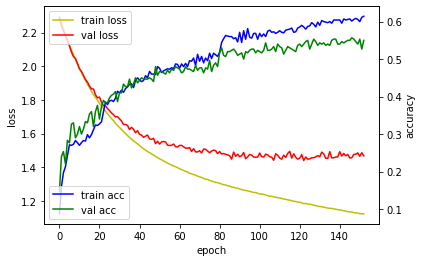

In [179]:
figs, loss_ax = plt.subplots()

# 축을 공유하는 플랏을 만드는 함수
acc_ax = loss_ax.twinx()
# loss 그래프
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
# acc 그래프
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

# 범례
loss_ax.legend(loc='upper left')

acc_ax.legend(loc='lower left')

# 축이름
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

acc_ax.set_ylabel('accuracy')

plt.show()

# 실습

In [180]:
import tensorflow as tf

In [182]:
# 동일한 랜덤 값을 얻기위한 seed 지정
seed = 123

np.random.seed(seed)
tf.set_random_seed(seed)

In [186]:
# np.loadtxt로 불러오기 => csv를 np.array로 불러오기
dataset = np.loadtxt('data/dataset/ThoraricSurgery.csv', delimiter=',')
dataset

array([[293.  ,   1.  ,   3.8 , ...,   0.  ,  62.  ,   0.  ],
       [  1.  ,   2.  ,   2.88, ...,   0.  ,  60.  ,   0.  ],
       [  8.  ,   2.  ,   3.19, ...,   0.  ,  66.  ,   1.  ],
       ...,
       [406.  ,   6.  ,   5.36, ...,   0.  ,  62.  ,   0.  ],
       [ 25.  ,   8.  ,   4.32, ...,   0.  ,  58.  ,   1.  ],
       [447.  ,   8.  ,   5.2 , ...,   0.  ,  49.  ,   0.  ]])

In [195]:
dataset.shape  # 470, 18

# 데이터 분할
x = dataset[:,0:17]
y = dataset[:,17]  # 1 : 수술 후 생존 / 0 : 사망

In [201]:
y.shape

(470,)

In [208]:
# 모델 구성
model = Sequential()
model.add(Dense(30,input_dim=17,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [209]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [210]:
model.fit(x, y, epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 436us/step - loss: 0.1491 - accuracy: 0.8511
Epoch 2/30
470/470 [==============================] - 0s 92us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 3/30
470/470 [==============================] - 0s 96us/step - loss: 0.1486 - accuracy: 0.8489
Epoch 4/30
470/470 [==============================] - 0s 91us/step - loss: 0.1469 - accuracy: 0.8532
Epoch 5/30
470/470 [==============================] - 0s 91us/step - loss: 0.1477 - accuracy: 0.8489
Epoch 6/30
470/470 [==============================] - 0s 89us/step - loss: 0.1498 - accuracy: 0.8489
Epoch 7/30
470/470 [==============================] - 0s 96us/step - loss: 0.1487 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 91us/step - loss: 0.1478 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 136us/step - loss: 0.1481 - accuracy: 0.8489
Epoch 10/30
470/470 [==============================] - 0s 164us/step - loss: 0.1459 - acc

In [212]:
model.evaluate(x,y)

470/470 [==============================] - 0s 119us/step


[0.14437511398437175, 0.8553191423416138]

In [240]:
pd.DataFrame(xy)[8].value_counts()

1.0    496
0.0    263
Name: 8, dtype: int64

In [234]:
xy = np.loadtxt('data/실습데이터/data-03-diabetes.csv', delimiter=',')

xdata = xy[:,:-1]  # (759, 8)
# 2차원으로 읽기
ydata = xy[:,[-1]]  # (759, 1)

In [242]:
w = tf.Variable(tf.random_normal([8,1]))
b = tf.Variable(tf.random_normal([1]))

x = tf.placeholder(tf.float32, shape=[None, 8])
y = tf.placeholder(tf.float32, shape=[None, 1])

In [243]:
# 예측값
hf = tf.sigmoid( tf.matmul(x,w) + b )

# loss함수
cost = -tf.reduce_mean( y * tf.log(hf) + (1-y) * (tf.log(1-hf)) )

# cost 최소화
train = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [245]:
# 0.5 값이 나오면 1 아니면 0으로 cast
predicted = tf.cast(hf>0.5, dtype=tf.float32)

# 평균으로 정확도를 구한다.
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y), dtype=tf.float32))

In [249]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        _, cv = sess.run([train, cost], feed_dict={x:xdata, y:ydata})
        if step % 1000 == 0 :
            print('step : ',step, 'cost : ',cv)
            
    hfv, pv, av = sess.run([hf, predicted, accuracy], feed_dict={x:xdata, y:ydata})
    
    print(hfv, pv, av)

step :  0 cost :  0.71645546
step :  1000 cost :  0.5783056
step :  2000 cost :  0.5428046
step :  3000 cost :  0.522
step :  4000 cost :  0.50904375
step :  5000 cost :  0.5005169
step :  6000 cost :  0.49463505
step :  7000 cost :  0.49041528
step :  8000 cost :  0.48728672
step :  9000 cost :  0.4849018
step :  10000 cost :  0.48303992
[[0.43517378]
 [0.9305253 ]
 [0.21276909]
 [0.9403849 ]
 [0.2814071 ]
 [0.734638  ]
 [0.9442921 ]
 [0.6298966 ]
 [0.21975067]
 [0.49394792]
 [0.6655098 ]
 [0.178424  ]
 [0.2847036 ]
 [0.33321157]
 [0.7636914 ]
 [0.45983672]
 [0.7256181 ]
 [0.8767173 ]
 [0.8022256 ]
 [0.5524271 ]
 [0.6760626 ]
 [0.08871558]
 [0.6650007 ]
 [0.6867694 ]
 [0.3574233 ]
 [0.93448853]
 [0.55365187]
 [0.60434335]
 [0.7453991 ]
 [0.41059196]
 [0.95476604]
 [0.8409748 ]
 [0.621994  ]
 [0.8373132 ]
 [0.3776161 ]
 [0.6932457 ]
 [0.83715796]
 [0.5725293 ]
 [0.41365498]
 [0.37030387]
 [0.8342134 ]
 [0.14750344]
 [0.3923083 ]
 [0.08253655]
 [0.5667026 ]
 [0.94042814]
 [0.75744206]
 

In [ ]:
# 주식 종가 예측 

In [311]:
xy = np.loadtxt('data/실습데이터/data-02-stock_daily.csv', delimiter=',')

# 데이터 분할
x = xy[:,:-1]    # 732, 4
y = xy[:,[-1]]   # 732, 1

In [313]:
from sklearn.model_selection import train_test_split

In [324]:
# 데이터셋 분할 70 : 30
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7, random_state=seed)

In [315]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [345]:
# 모델 생성
model = Sequential()

In [346]:
# layer 추가
# model.add(Dense(input_dim=4, units=30, activation='relu'))
model.add(Dense(units=1))

In [347]:
# 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [348]:
hist = model.fit(xTrain, yTrain, epochs=500, batch_size=15)

Epoch 1/500
512/512 [==============================] - 0s 338us/step - loss: 743298411072.0000 - accuracy: 0.0000e+00
Epoch 2/500
512/512 [==============================] - 0s 80us/step - loss: 627431300096.0000 - accuracy: 0.0000e+00
Epoch 3/500
512/512 [==============================] - 0s 80us/step - loss: 526536452288.0000 - accuracy: 0.0000e+00
Epoch 4/500
512/512 [==============================] - 0s 76us/step - loss: 438062212480.0000 - accuracy: 0.0000e+00
Epoch 5/500
512/512 [==============================] - 0s 139us/step - loss: 358375861216.0000 - accuracy: 0.0000e+00
Epoch 6/500
512/512 [==============================] - 0s 121us/step - loss: 293379840896.0000 - accuracy: 0.0000e+00
Epoch 7/500
512/512 [==============================] - 0s 84us/step - loss: 238436422144.0000 - accuracy: 0.0000e+00
Epoch 8/500
512/512 [==============================] - 0s 92us/step - loss: 191943616752.0000 - accuracy: 0.0000e+00
Epoch 9/500
512/512 [==============================] - 0s 72u

512/512 [==============================] - 0s 66us/step - loss: 95510.7899 - accuracy: 0.0000e+00
Epoch 74/500
512/512 [==============================] - 0s 68us/step - loss: 95619.6230 - accuracy: 0.0000e+00
Epoch 75/500
512/512 [==============================] - 0s 70us/step - loss: 95603.1900 - accuracy: 0.0000e+00
Epoch 76/500
512/512 [==============================] - 0s 72us/step - loss: 95625.9004 - accuracy: 0.0000e+00
Epoch 77/500
512/512 [==============================] - 0s 70us/step - loss: 95487.9874 - accuracy: 0.0000e+00
Epoch 78/500
512/512 [==============================] - 0s 68us/step - loss: 95358.3038 - accuracy: 0.0000e+00
Epoch 79/500
512/512 [==============================] - 0s 72us/step - loss: 95448.9993 - accuracy: 0.0000e+00
Epoch 80/500
512/512 [==============================] - 0s 72us/step - loss: 95364.5008 - accuracy: 0.0000e+00
Epoch 81/500
512/512 [==============================] - 0s 78us/step - loss: 95286.1538 - accuracy: 0.0000e+00
Epoch 82/500
5

512/512 [==============================] - 0s 70us/step - loss: 92561.9570 - accuracy: 0.0000e+00
Epoch 147/500
512/512 [==============================] - 0s 74us/step - loss: 91622.0101 - accuracy: 0.0000e+00
Epoch 148/500
512/512 [==============================] - 0s 72us/step - loss: 92867.2067 - accuracy: 0.0000e+00
Epoch 149/500
512/512 [==============================] - 0s 74us/step - loss: 91855.2885 - accuracy: 0.0000e+00
Epoch 150/500
512/512 [==============================] - 0s 68us/step - loss: 91586.1060 - accuracy: 0.0000e+00
Epoch 151/500
512/512 [==============================] - 0s 76us/step - loss: 91141.2096 - accuracy: 0.0000e+00
Epoch 152/500
512/512 [==============================] - 0s 74us/step - loss: 90971.5710 - accuracy: 0.0000e+00
Epoch 153/500
512/512 [==============================] - 0s 74us/step - loss: 91044.5626 - accuracy: 0.0000e+00
Epoch 154/500
512/512 [==============================] - 0s 76us/step - loss: 91127.6355 - accuracy: 0.0000e+00
Epoch 

512/512 [==============================] - 0s 78us/step - loss: 77949.2099 - accuracy: 0.0000e+00
Epoch 220/500
512/512 [==============================] - 0s 72us/step - loss: 77728.4742 - accuracy: 0.0000e+00
Epoch 221/500
512/512 [==============================] - 0s 78us/step - loss: 78160.5647 - accuracy: 0.0000e+00
Epoch 222/500
512/512 [==============================] - 0s 72us/step - loss: 77309.9971 - accuracy: 0.0000e+00
Epoch 223/500
512/512 [==============================] - 0s 72us/step - loss: 77387.8471 - accuracy: 0.0000e+00
Epoch 224/500
512/512 [==============================] - 0s 70us/step - loss: 76934.2476 - accuracy: 0.0000e+00
Epoch 225/500
512/512 [==============================] - 0s 70us/step - loss: 78036.6915 - accuracy: 0.0000e+00
Epoch 226/500
512/512 [==============================] - 0s 76us/step - loss: 78420.9514 - accuracy: 0.0000e+00
Epoch 227/500
512/512 [==============================] - 0s 76us/step - loss: 77993.5230 - accuracy: 0.0000e+00
Epoch 

512/512 [==============================] - 0s 66us/step - loss: 51482.8118 - accuracy: 0.0000e+00
Epoch 293/500
512/512 [==============================] - 0s 68us/step - loss: 43018.0767 - accuracy: 0.0000e+00
Epoch 294/500
512/512 [==============================] - 0s 72us/step - loss: 41942.2566 - accuracy: 0.0000e+00
Epoch 295/500
512/512 [==============================] - 0s 66us/step - loss: 43875.3445 - accuracy: 0.0000e+00
Epoch 296/500
512/512 [==============================] - 0s 64us/step - loss: 43800.6276 - accuracy: 0.0000e+00
Epoch 297/500
512/512 [==============================] - 0s 68us/step - loss: 40648.6451 - accuracy: 0.0000e+00
Epoch 298/500
512/512 [==============================] - 0s 76us/step - loss: 44640.7796 - accuracy: 0.0000e+00
Epoch 299/500
512/512 [==============================] - 0s 70us/step - loss: 43527.4708 - accuracy: 0.0000e+00
Epoch 300/500
512/512 [==============================] - 0s 70us/step - loss: 42956.5150 - accuracy: 0.0000e+00
Epoch 

512/512 [==============================] - 0s 72us/step - loss: 9190.9457 - accuracy: 0.0000e+00
Epoch 366/500
512/512 [==============================] - 0s 76us/step - loss: 5686.9631 - accuracy: 0.0000e+00
Epoch 367/500
512/512 [==============================] - 0s 80us/step - loss: 6304.8960 - accuracy: 0.0000e+00
Epoch 368/500
512/512 [==============================] - 0s 68us/step - loss: 5112.2472 - accuracy: 0.0000e+00
Epoch 369/500
512/512 [==============================] - 0s 70us/step - loss: 5227.8666 - accuracy: 0.0000e+00
Epoch 370/500
512/512 [==============================] - 0s 76us/step - loss: 11554.7943 - accuracy: 0.0000e+00
Epoch 371/500
512/512 [==============================] - 0s 70us/step - loss: 5001.9249 - accuracy: 0.0000e+00
Epoch 372/500
512/512 [==============================] - 0s 74us/step - loss: 7199.4876 - accuracy: 0.0000e+00
Epoch 373/500
512/512 [==============================] - 0s 68us/step - loss: 4023.0989 - accuracy: 0.0000e+00
Epoch 374/500


512/512 [==============================] - 0s 84us/step - loss: 82.4785 - accuracy: 0.0000e+00
Epoch 440/500
512/512 [==============================] - 0s 76us/step - loss: 62.2520 - accuracy: 0.0000e+00
Epoch 441/500
512/512 [==============================] - 0s 84us/step - loss: 202.2577 - accuracy: 0.0000e+00
Epoch 442/500
512/512 [==============================] - 0s 74us/step - loss: 148.2094 - accuracy: 0.0000e+00
Epoch 443/500
512/512 [==============================] - 0s 76us/step - loss: 1465.5424 - accuracy: 0.0000e+00
Epoch 444/500
512/512 [==============================] - 0s 74us/step - loss: 10727.4336 - accuracy: 0.0000e+00
Epoch 445/500
512/512 [==============================] - 0s 84us/step - loss: 4608.2429 - accuracy: 0.0000e+00
Epoch 446/500
512/512 [==============================] - 0s 92us/step - loss: 1288.2893 - accuracy: 0.0000e+00
Epoch 447/500
512/512 [==============================] - 0s 82us/step - loss: 58.7648 - accuracy: 0.0000e+00
Epoch 448/500
512/512 

In [349]:
hist.history['loss']

[743298411072.0,
 627431300096.0,
 526536452288.0,
 438062212480.0,
 358375861216.0,
 293379840896.0,
 238436422144.0,
 191943616752.0,
 153742887136.0,
 121574496936.0,
 94991638376.0,
 73520784296.0,
 56517702300.0,
 42962299592.0,
 31844055572.0,
 23732036774.0,
 17247784358.0,
 12387010707.0,
 8655951872.0,
 6023130720.5,
 4231722364.5,
 2904471121.0,
 1966968413.125,
 1317274928.0,
 879423006.5625,
 564158900.25,
 363589316.3125,
 230730744.984375,
 144949495.796875,
 89977036.08984375,
 54709341.90625,
 32924482.224609375,
 19413866.109375,
 11198199.287597656,
 6526281.510253906,
 3720867.090576172,
 2087417.7973632812,
 1173487.2098999023,
 669491.8656311035,
 397715.2810611725,
 254953.4603652954,
 178794.61471414566,
 139206.9850769043,
 116928.38297367096,
 106079.00926208496,
 101194.59688568115,
 98543.56803131104,
 97327.07120513916,
 96611.81510162354,
 96374.66958618164,
 95964.89343643188,
 96000.83329772949,
 95972.00344085693,
 96012.2911453247,
 95963.39527893066,
 

In [350]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'loss')

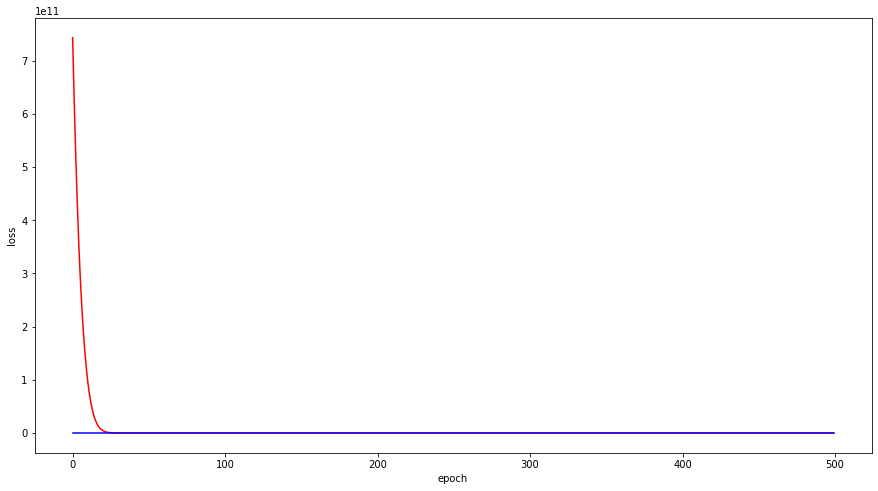

In [481]:
plt.figure(figsize=[15,8])

plt.plot(hist.history['loss'], 'r')
# plt.plot(hist.history['accuracy'], 'b')
plt.xlabel('epoch')
plt.ylabel('loss')


In [352]:
# 모델 평가
model.evaluate(xTest, yTest, batch_size=15)

220/220 [==============================] - 0s 491us/step


[75.9870267347856, 0.0]

In [355]:
# 모델 예측
(model.predict(xTest) - yTest).mean()

0.7388871188476527

In [356]:
# tensor flow 로 선형 회귀 해보기

In [357]:
import tensorflow as tf

In [427]:
seed = 777
np.random.seed(seed)
tf.set_random_seed(seed)

In [467]:
xy = np.loadtxt('data/실습데이터/data-02-stock_daily.csv', delimiter=',')

# 데이터 분할
x = xy[:,:-1]    # 732, 4
y = xy[:,[-1]]   # 732, 1

In [468]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [469]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [470]:
# 데이터셋 분할 70 : 30
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7, random_state=seed)

In [471]:
w = tf.Variable(tf.random_normal([4,1], mean=0.01, stddev=0.01))
b =  tf.Variable(tf.random_normal([1]))
x = tf.placeholder(tf.float32, shape=[None,4])
y = tf.placeholder(tf.float32, shape=[None,1])

In [472]:
hf = tf.matmul(x, w) + b
hf = tf.clip_by_value(hf, 1e-10, 1.0)
cost = tf.reduce_mean(tf.square(hf - y))

In [479]:
train = tf.train.GradientDescentOptimizer(0.001).minimize(cost)

In [480]:
with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(10001):
        _, hfv, cv = sess.run([train, hf, cost], feed_dict={x:xTrain, y:yTrain})
        
        if step % 1000 == 0 :
            print('{}step \n 오차 : {}'.format(step, cv))
    

0step 
 오차 : 428063.375
1000step 
 오차 : 428063.375
2000step 
 오차 : 428063.375
3000step 
 오차 : 428063.375
4000step 
 오차 : 428063.375
5000step 
 오차 : 428063.375
6000step 
 오차 : 428063.375
7000step 
 오차 : 428063.375
8000step 
 오차 : 428063.375
9000step 
 오차 : 428063.375
10000step 
 오차 : 428063.375


In [509]:
xy = pd.read_csv('data/실습데이터/trees.csv')
xy = np.array(xy)

x = xy[:,:-1]
y = xy[:,[-1]]

In [510]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [511]:
# 데이터셋 분할 70 : 30
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7, random_state=seed)

In [512]:
w = tf.Variable(tf.random_normal([2,1], mean=0.01, stddev=0.01))
b =  tf.Variable(tf.random_normal([1]))

x = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

In [517]:
hf = tf.matmul(x, w) + b
# hf = tf.clip_by_value(hf, 1e-10, 1.0)
cost = tf.reduce_mean(tf.square(hf - y))

In [518]:
train = tf.train.GradientDescentOptimizer(0.0001).minimize(cost)

In [520]:
cost_list = []

with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for step in range(20001):
        _, hfv, cv = sess.run([train, hf, cost], feed_dict={x:xTrain, y:yTrain})
        
        cost_list.append(cv)
        
        if step % 1000 == 0 :
            print('{}step \n 오차 : {}'.format(step, cv))
        

0step 
 오차 : 1061.63037109375
1000step 
 오차 : 708.6178588867188
2000step 
 오차 : 478.6383972167969
3000step 
 오차 : 327.34881591796875
4000step 
 오차 : 227.01162719726562
5000step 
 오차 : 160.0042724609375
6000step 
 오차 : 114.981689453125
7000step 
 오차 : 84.56138610839844
8000step 
 오차 : 63.8965950012207
9000step 
 오차 : 49.78135299682617
10000step 
 오차 : 40.0835075378418
11000step 
 오차 : 33.37816619873047
12000step 
 오차 : 28.708663940429688
13000step 
 오차 : 25.430587768554688
14000step 
 오차 : 23.108463287353516
15000step 
 오차 : 21.446813583374023
16000step 
 오차 : 20.244491577148438
17000step 
 오차 : 19.364011764526367
18000step 
 오차 : 18.710954666137695
19000step 
 오차 : 18.220157623291016
20000step 
 오차 : 17.846431732177734


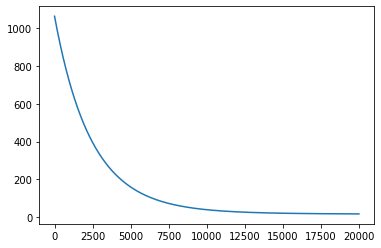

In [521]:
plt.figure()
plt.plot(cost_list)